# AirBnB Analytics

#### Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import geopy

#### Cargar ficheros csv

In [2]:

london_airbnb_xlstocsv = pd.read_csv('../raw_data/london_airbnb_xlstocsv.csv', sep=';')

london_airbnb = pd.read_csv('../raw_data/london_airbnb.csv', sep=',')

milan_airbnb_xlstocsv = pd.read_csv('../raw_data/milan_airbnb_xlstocsv.csv', sep=';')

madrid_airbnb = pd.read_csv('../raw_data/madrid_airbnb.csv', sep=',')

milan_airbnb = pd.read_csv('../raw_data/milan_airbnb.csv', sep=',')

NY_airbnb = pd.read_csv('../raw_data/NY_airbnb.csv', sep=',')

sydney_airbnb = pd.read_csv('../raw_data/sydney_airbnb.csv', sep=',')

tokyo_airbnb = pd.read_csv('../raw_data/tokyo_airbnb.csv', sep=',')

df_list = [london_airbnb_xlstocsv, london_airbnb, milan_airbnb_xlstocsv, milan_airbnb, NY_airbnb, sydney_airbnb, tokyo_airbnb, madrid_airbnb]



#### Insert City Column

In [3]:
# Assuming df_list contains the DataFrames
df_list = [london_airbnb_xlstocsv, london_airbnb, milan_airbnb_xlstocsv, milan_airbnb, NY_airbnb, sydney_airbnb, tokyo_airbnb, madrid_airbnb]

# Loop through each DataFrame in df_list
for df in df_list:
    # Extract the city name from the variable name
    city_val = [name for name in globals() if globals()[name] is df][0].split('_')[0]
    
    # Add a new column 'letters' with the city_val (optional content) 
    df['city'] = city_val.capitalize()  # You can adjust what content should go in 'letters'

    # Append the updated DataFrame to the new list



#### Contenido de los ficheros

Aquí te explico lo que contiene cada columna de tu dataframe basado en la muestra de datos:

1. **id**: Identificador único del anuncio en la plataforma de AirBnB.
   - Ejemplo: `11551.0`

2. **name**: Nombre o título descriptivo del alojamiento.
   - Ejemplo: `Arty and Bright London Apartment in Zone 2`

3. **host_id**: Identificador único del anfitrión que ofrece el alojamiento.
   - Ejemplo: `43039.0`

4. **host_name**: Nombre del anfitrión del alojamiento.
   - Ejemplo: `Adriano`

5. **neighbourhood_group**: Agrupación geográfica más amplia de los vecindarios. En muchos casos, este campo es nulo.
   - Ejemplo: `NaN` (no disponible en esta muestra)

6. **neighbourhood**: Nombre del vecindario donde se ubica el alojamiento.
   - Ejemplo: `Lambeth`

7. **latitude**: Latitud de la ubicación del alojamiento (la latitud de la ubicación puede estar mal formateada, ya que parece incluir caracteres innecesarios en este caso).
   - Ejemplo: `5.146.225` (el formato es incorrecto, posiblemente debería ser un número decimal)

8. **longitude**: Longitud de la ubicación del alojamiento (al igual que con la latitud, el formato podría ser incorrecto).
   - Ejemplo: `-11.732` (este parece estar bien, pero debería revisarse la consistencia con la latitud)

9. **room_type**: Tipo de habitación o alojamiento ofrecido (ejemplo: apartamento completo o habitación privada).
   - Ejemplo: `Entire home/apt`

10. **price**: Precio por noche del alojamiento, expresado en la moneda local.
    - Ejemplo: `88.0`

11. **minimum_nights**: Número mínimo de noches requeridas para reservar el alojamiento.
    - Ejemplo: `3.0`

12. **number_of_reviews**: Cantidad total de reseñas que ha recibido el alojamiento.
    - Ejemplo: `185.0`

13. **last_review**: Fecha de la última reseña recibida para el alojamiento.
    - Ejemplo: `2019-09-15`

14. **reviews_per_month**: Promedio de reseñas recibidas por mes.
    - Ejemplo: `1.58`

15. **calculated_host_listings_count**: Número de anuncios que tiene el anfitrión en la plataforma (puede estar mal etiquetado o no ser consistente, ya que parece un valor numérico pero está como string en algunos casos).
    - Ejemplo: `2.0`

16. **availability_365**: Número de días que el alojamiento está disponible para reservar en un año.
    - Ejemplo: `336.0`

17. **city**: Ciudad donde se encuentra el alojamiento.
    - Ejemplo: `London`

Revisar el formato de algunos campos, como **latitude** y **longitude**, sería importante para garantizar la precisión en el análisis.

#### Crea una tabla con todas las columnas de cada dataframe para determinar qué datasets tienen columnas faltantes.

In [4]:
# Assuming df_list contains the DataFrames
df_list = {
    'london_airbnb_xlstocsv': london_airbnb_xlstocsv,
    'london_airbnb': london_airbnb,
    'milan_airbnb_xlstocsv': milan_airbnb_xlstocsv,
    'milan_airbnb': milan_airbnb,
    'NY_airbnb': NY_airbnb,
    'sydney_airbnb': sydney_airbnb,
    'tokyo_airbnb': tokyo_airbnb,
    'madrid_airbnb': madrid_airbnb
}

# Initialize an empty set to collect all unique column names
all_columns = set()

# Collect all unique column names from each DataFrame
for df in df_list.values():
    all_columns.update(df.columns.tolist())  # Convert to list to avoid ambiguous truth value

# Convert the set of all columns to a sorted list (for consistent ordering)
all_columns = sorted(all_columns)

# Create a dictionary to hold the presence/absence of each column in each DataFrame
column_presence = {name: [col in df.columns.tolist() for col in all_columns] for name, df in df_list.items()}

# Create a DataFrame that shows the presence of each column in each DataFrame
column_summary = pd.DataFrame(column_presence, index=all_columns)

# Reset index to turn column names into a regular column
column_summary.reset_index(inplace=True)
column_summary.rename(columns={'index': 'Column'}, inplace=True)

# Show the resulting table
column_summary.head()



,Column,london_airbnb_xlstocsv,london_airbnb,milan_airbnb_xlstocsv,milan_airbnb,NY_airbnb,sydney_airbnb,tokyo_airbnb,madrid_airbnb
0,availability_365,True,True,True,True,True,True,False,True
1,calculated_host_listings_count,True,True,True,True,True,True,False,True
2,city,True,True,True,True,True,True,True,True
3,host_id,True,True,True,True,True,True,True,True
4,host_name,True,True,True,True,True,True,True,True


#### Mezclar todos los dataframes en uno solo

In [5]:
# Assuming df_list contains the DataFrames
df_list = [london_airbnb_xlstocsv, london_airbnb, milan_airbnb_xlstocsv, milan_airbnb, NY_airbnb, sydney_airbnb, tokyo_airbnb, madrid_airbnb]

# Concatenate all DataFrames, keeping all columns
df = pd.concat(df_list, ignore_index=True, sort=False)

#### Insertar el valor 'no definido' en las columnas faltantes en los dataframes de Milan y Tokyo

In [6]:
## Asigna el valor "no_definido" a las columnas que no estaban incluidas en los dataframes originales
df.loc[df['city'] == 'Milan', 'neighbourhood_group'] = np.nan
df.loc[df['city'] == 'Tokyo', 'availability_365'] = np.nan
df.loc[df['city'] == 'Tokyo', 'calculated_host_listings_count'] = np.nan

In [7]:
# Apply title case to neighbourhood column where city is Milan and neighbourhood is in upper case
milan_mask = (df['city'] == 'Milan') & (df['neighbourhood'].str.isupper())
df.loc[milan_mask, 'neighbourhood'] = df.loc[milan_mask, 'neighbourhood'].str.title()



In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,11551.0,Arty and Bright London Apartment in Zone 2,43039.0,Adriano,NaN,Lambeth,5.146.225,-11.732,Entire home/apt,88.0,3.0,185.0,2019-09-15,1.58,2.0,336.0,London
1,13913.0,Holiday London DB Room Let-on going,54730.0,Alina,NaN,Islington,5.156.802,-11.121,Private room,65.0,1.0,19.0,2019-10-07,0.17,2.0,365.0,London
2,90700.0,Sunny Notting Hill flat & terrace,491286.0,Chil,NaN,Kensington and Chelsea,5.151.074,-19.853,Entire home/apt,105.0,2.0,339.0,2019-07-30,3.33,2.0,268.0,London
3,15400.0,Bright Chelsea Apartment. Chelsea!,60302.0,Philippa,NaN,Kensington and Chelsea,5.148.796,-16.898,Entire home/apt,100.0,30.0,88.0,2019-09-23,0.73,1.0,158.0,London
4,92399.0,"MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...",497366.0,Andrea & Mark,NaN,Islington,5.155.071,-8.547,Private room,77.0,1.0,207.0,2019-10-21,2.04,2.0,336.0,London


In [9]:
df.shape

(323423, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323423 entries, 0 to 323422
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              323421 non-null  float64
 1   name                            323318 non-null  object 
 2   host_id                         323421 non-null  float64
 3   host_name                       322579 non-null  object 
 4   neighbourhood_group             68513 non-null   object 
 5   neighbourhood                   323421 non-null  object 
 6   latitude                        323421 non-null  object 
 7   longitude                       323421 non-null  object 
 8   room_type                       323421 non-null  object 
 9   price                           323421 non-null  float64
 10  minimum_nights                  323421 non-null  float64
 11  number_of_reviews               323421 non-null  float64
 12  last_review     

#### Conteos varios de las características de los campos

In [11]:
# Funciones comunes de calidad de los datos

# Sample function to check if latitude is valid
def is_valid_latitude(latitude):
    try:
        lat = float(latitude)
        return -90 <= lat <= 90
    except ValueError:
        return False

# Sample function to check if longitude is valid
def is_valid_longitude(longitude):
    try:
        lon = float(longitude)
        return -180 <= lon <= 180
    except ValueError:
        return False

In [12]:

# Number of records by city
records_by_city = df['city'].value_counts()
print("Number of records by city:")
print(records_by_city)

# Number of records with incorrect latitude by city
incorrect_latitude_by_city = df[~df['latitude'].apply(is_valid_latitude)]['city'].value_counts()
print("\nNumber of records with incorrect latitude by city:")
print(incorrect_latitude_by_city)

# Number of records with incorrect longitude by city
incorrect_longitude_by_city = df[~df['longitude'].apply(is_valid_longitude)]['city'].value_counts()
print("\nNumber of records with incorrect longitude by city:")
print(incorrect_longitude_by_city)

# Number of records with incorrect latitude and longitude by city
incorrect_lat_long_by_city = df[~df['latitude'].apply(is_valid_latitude) & ~df['longitude'].apply(is_valid_longitude)]['city'].value_counts()
print("\nNumber of records with incorrect latitude and longitude by city:")
print(incorrect_lat_long_by_city)

# Number of duplicated records where id is the column to compare
duplicated_records_by_id = df[df.duplicated(subset='id', keep=False)]['id'].nunique()
print("\nNumber of duplicated records where id is the column to compare:")
print(duplicated_records_by_id)

# Number of distinct records where id is the column to compare
distinct_records_by_id = df['id'].nunique()
print("\nNumber of distinct records where id is the column to compare:")
print(distinct_records_by_id)


Number of records by city:
city
London    170136
Ny         48895
Sydney     36662
Milan      36646
Madrid     19618
Tokyo      11466
Name: count, dtype: int64

Number of records with incorrect latitude by city:
city
London    84190
Milan     18138
Name: count, dtype: int64

Number of records with incorrect longitude by city:
city
Milan     16548
London     4253
Name: count, dtype: int64

Number of records with incorrect latitude and longitude by city:
city
Milan     16376
London     4213
Name: count, dtype: int64

Number of duplicated records where id is the column to compare:
103390

Number of distinct records where id is the column to compare:
220031


#### Eliminar registros duplicados. Utilizando el parametro keep = 'last' en este dataset nos sirve para eliminar el registro con latitud y longitud incorrecta

In [13]:
# Remove duplicated records based on 'id' column
df.drop_duplicates(subset='id', keep='last', inplace=True)

# Display the shape of the DataFrame to verify the changes
print(df.shape)

(220032, 17)


In [14]:

# Number of records by city
records_by_city = df['city'].value_counts()
print("Number of records by city:")
print(records_by_city)

# Number of records with incorrect latitude by city
incorrect_latitude_by_city = df[~df['latitude'].apply(is_valid_latitude)]['city'].value_counts()
print("\nNumber of records with incorrect latitude by city:")
print(incorrect_latitude_by_city)

# Number of records with incorrect longitude by city
incorrect_longitude_by_city = df[~df['longitude'].apply(is_valid_longitude)]['city'].value_counts()
print("\nNumber of records with incorrect longitude by city:")
print(incorrect_longitude_by_city)

# Number of records with incorrect latitude and longitude by city
incorrect_lat_long_by_city = df[~df['latitude'].apply(is_valid_latitude) & ~df['longitude'].apply(is_valid_longitude)]['city'].value_counts()
print("\nNumber of records with incorrect latitude and longitude by city:")
print(incorrect_lat_long_by_city)

# Number of duplicated records where id is the column to compare
duplicated_records_by_id = df[df.duplicated(subset='id', keep=False)]['id'].nunique()
print("\nNumber of duplicated records where id is the column to compare:")
print(duplicated_records_by_id)

# Number of distinct records where id is the column to compare
distinct_records_by_id = df['id'].nunique()
print("\nNumber of distinct records where id is the column to compare:")
print(distinct_records_by_id)


Number of records by city:
city
London    85068
Ny        48895
Sydney    36662
Madrid    19618
Milan     18323
Tokyo     11466
Name: count, dtype: int64

Number of records with incorrect latitude by city:
city
Milan    1
Name: count, dtype: int64

Number of records with incorrect longitude by city:
city
Milan    1
Name: count, dtype: int64

Number of records with incorrect latitude and longitude by city:
city
Milan    1
Name: count, dtype: int64

Number of duplicated records where id is the column to compare:
0

Number of distinct records where id is the column to compare:
220031


In [15]:
# Filter the DataFrame to get records with incorrect longitude
incorrect_longitude_records = df[~df['longitude'].apply(is_valid_longitude)]

# Display the records with incorrect longitude
print(incorrect_longitude_records)

        id name  host_id host_name neighbourhood_group neighbourhood latitude  \
188459 NaN  NaN      NaN       NaN                 NaN           NaN      NaN   

       longitude room_type  price  minimum_nights  number_of_reviews  \
188459       NaN       NaN    NaN             NaN                NaN   

       last_review  reviews_per_month  calculated_host_listings_count  \
188459         NaN                NaN                             NaN   

        availability_365   city  
188459               NaN  Milan  


#### Remover registros con id nulo

In [16]:
# Count the number of records with null id
null_id_count = df['id'].isnull().sum()

# Remove records where id is null
df = df.dropna(subset=['id'])

# Print the number of records affected
print(f"Number of records with null id removed: {null_id_count}")

Number of records with null id removed: 1


In [17]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
85068,11551.0,Arty and Bright London Apartment in Zone 2,43039.0,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88.0,3.0,185.0,2019-09-15,1.58,2.0,336.0,London
85069,13913.0,Holiday London DB Room Let-on going,54730.0,Alina,NaN,Islington,51.56802,-0.11121,Private room,65.0,1.0,19.0,2019-10-07,0.17,2.0,365.0,London
85070,90700.0,Sunny Notting Hill flat & terrace,491286.0,Chil,NaN,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105.0,2.0,339.0,2019-07-30,3.33,2.0,268.0,London
85071,15400.0,Bright Chelsea Apartment. Chelsea!,60302.0,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100.0,30.0,88.0,2019-09-23,0.73,1.0,158.0,London
85072,92399.0,"MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...",497366.0,Andrea & Mark,NaN,Islington,51.55071,-0.08547,Private room,77.0,1.0,207.0,2019-10-21,2.04,2.0,336.0,London


#### Analizar Neighbourhood group para intentar corregir valores nulos.

In [18]:
# Create a frequency table of neighbourhood and neighbourhood_group by city, including records where neighbourhood_group is null
frequency_table = df.groupby(['city', 'neighbourhood', 'neighbourhood_group'], dropna=False).size().reset_index(name='count')

# Display the frequency table
frequency_table.head()


,city,neighbourhood,neighbourhood_group,count
0,London,Barking and Dagenham,NaN,372
1,London,Barnet,NaN,1659
2,London,Bexley,NaN,269
3,London,Brent,NaN,2561
4,London,Bromley,NaN,679


Londres, Milan, Syndey y Tokyio no tienen información del Neighborhood Group.

He intentado corregirla buscando informacion de distritos pero está tomando mucho tiempo. De momento lo dejo así.



### Exploratory Data Analysis

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220031 entries, 85068 to 323422
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              220031 non-null  float64
 1   name                            219964 non-null  object 
 2   host_id                         220031 non-null  float64
 3   host_name                       219325 non-null  object 
 4   neighbourhood_group             68513 non-null   object 
 5   neighbourhood                   220031 non-null  object 
 6   latitude                        220031 non-null  object 
 7   longitude                       220031 non-null  object 
 8   room_type                       220031 non-null  object 
 9   price                           220031 non-null  float64
 10  minimum_nights                  220031 non-null  float64
 11  number_of_reviews               220031 non-null  float64
 12  last_review      

In [20]:
# Convert latitude, longitude, and availability_365 to float64
df['latitude'] = df['latitude'].astype('float64')
df['longitude'] = df['longitude'].astype('float64')
df['availability_365'] = df['availability_365'].astype('float64')


In [21]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.200310e+05,2.200310e+05,220031.000000,220031.000000,2.200310e+05,220031.000000,220031.000000,165660.000000,208565.000000,208565.000000
mean,2.240831e+07,8.494528e+07,32.573053,16.428135,9.178157e+02,5.258023,20.129164,1.256772,14.189471,120.330918
std,1.175490e+07,8.856607e+07,30.144854,76.030471,8.285217e+03,20.118261,43.012277,1.524449,75.122354,134.644491
min,2.539000e+03,1.944000e+03,-34.135212,-74.244420,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.338370e+07,1.439602e+07,40.412620,-3.705870,5.500000e+01,1.000000,1.000000,0.200000,1.000000,0.000000
50%,2.249789e+07,4.640392e+07,40.794240,-0.128380,9.900000e+01,2.000000,4.000000,0.690000,1.000000,64.000000
75%,3.155445e+07,1.415097e+08,51.496200,9.199535,1.770000e+02,4.000000,19.000000,1.800000,3.000000,244.000000
max,5.095505e+07,4.117208e+08,51.681690,151.339811,1.000046e+06,1250.000000,896.000000,58.500000,999.000000,365.000000


In [22]:
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,city
count,219964,219325,68513,220031,220031,165660,220031
unique,213293,31499,26,562,4,4660,6
top,Home away from home,David,Manhattan,Westminster,Entire home/apt,2019-06-23,London
freq,53,1418,21661,9588,128154,1946,85068


#### Análisis de fechas

Esta es la cantidad de nulos originales en last_review

In [23]:
# Count the number of null records before conversion
null_count_before = df['last_review'].isnull().sum()
print(f"Number of null records before conversion: {null_count_before}")



Number of null records before conversion: 54371


invalid_last_review_df son los registros que tienen un formato de fecha incorrecto.

In [24]:
# Convert 'last_review' to datetime64[ns] with errors='coerce' to handle invalid parsing
df['last_review_converted'] = pd.to_datetime(df['last_review'], errors='coerce')

# Filter the DataFrame to get records where 'last_review_converted' is NaT (Not a Time)
invalid_last_review_df = df[df['last_review_converted'].isna() & df['last_review'].notna()]

# Drop the temporary 'last_review_converted' column
df.drop(columns=['last_review_converted'], inplace=True)

# Display the DataFrame with invalid 'last_review' values
invalid_last_review_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,last_review_converted
188460,6400.0,The Studio Milan,13822.0,Francesca,NaN,Tibaldi,45.44119,9.17813,Private room,100.0,4.0,12.0,19/04/10,0.14,1.0,358.0,Milan,NaT
188461,23986.0,""" Characteristic Milanese flat""",95941.0,Jeremy,NaN,Navigli,45.44806,9.17373,Entire home/apt,150.0,1.0,15.0,07/09/20,0.21,1.0,363.0,Milan,NaT
188462,28300.0,nice flat near the park,121663.0,Marta,NaN,Sarpi,45.47647,9.17359,Private room,180.0,1.0,8.0,22/04/12,0.11,1.0,365.0,Milan,NaT
188463,32119.0,Nico & Cynthia's Easy Yellow Suite,138683.0,Nico&Cinzia,NaN,Viale Monza,45.52014,9.22300,Entire home/apt,75.0,2.0,15.0,01/07/18,0.23,3.0,200.0,Milan,NaT
188464,32649.0,Nico&Cinzia's Red Easy Suite!,138683.0,Nico&Cinzia,NaN,Viale Monza,45.51874,9.22495,Entire home/apt,71.0,2.0,29.0,23/10/16,0.71,3.0,308.0,Milan,NaT


Análisis rápido de fechas con formato incorrecto por ciudad. Solo Milan tiene un formato diferente

In [25]:
# Group invalid_last_review_df by city and count the number of records
invalid_last_review_count_by_city = invalid_last_review_df.groupby('city').size()
print(invalid_last_review_count_by_city)


city
Milan    13260
dtype: int64


En el dataframe temporal, intentar convertir last_review_converted a datetime64[ns]

In [26]:
# Convert 'last_review' to datetime64[ns] with the specified format 'DD/MM/YY'
invalid_last_review_df['last_review_converted'] = pd.to_datetime(invalid_last_review_df['last_review'], format='%d/%m/%y', errors='coerce')

# Display the DataFrame to verify the changes
invalid_last_review_df.head()

C:\Users\jvazq\AppData\Local\Temp\ipykernel_5848\1173976929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invalid_last_review_df['last_review_converted'] = pd.to_datetime(invalid_last_review_df['last_review'], format='%d/%m/%y', errors='coerce')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,last_review_converted
188460,6400.0,The Studio Milan,13822.0,Francesca,NaN,Tibaldi,45.44119,9.17813,Private room,100.0,4.0,12.0,19/04/10,0.14,1.0,358.0,Milan,2010-04-19
188461,23986.0,""" Characteristic Milanese flat""",95941.0,Jeremy,NaN,Navigli,45.44806,9.17373,Entire home/apt,150.0,1.0,15.0,07/09/20,0.21,1.0,363.0,Milan,2020-09-07
188462,28300.0,nice flat near the park,121663.0,Marta,NaN,Sarpi,45.47647,9.17359,Private room,180.0,1.0,8.0,22/04/12,0.11,1.0,365.0,Milan,2012-04-22
188463,32119.0,Nico & Cynthia's Easy Yellow Suite,138683.0,Nico&Cinzia,NaN,Viale Monza,45.52014,9.22300,Entire home/apt,75.0,2.0,15.0,01/07/18,0.23,3.0,200.0,Milan,2018-07-01
188464,32649.0,Nico&Cinzia's Red Easy Suite!,138683.0,Nico&Cinzia,NaN,Viale Monza,45.51874,9.22495,Entire home/apt,71.0,2.0,29.0,23/10/16,0.71,3.0,308.0,Milan,2016-10-23


Actualiza df['last_review'] con el valor correcto de fecha

In [27]:
# Update df['last_review'] with invalid_last_review_df['last_review_converted']
df.update(invalid_last_review_df[['last_review_converted']].rename(columns={'last_review_converted': 'last_review'}))


Validación de la conversión a datetime. Los nulos tienen que ser los mismos antes y después de intentar convertir a fecha

In [28]:
# Count the number of null records before conversion
null_count_before = df['last_review'].isnull().sum()
print(f"Number of null records before conversion: {null_count_before}")

# Convert 'last_review' to datetime64[ns] with errors='coerce' to handle invalid parsing
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Count the number of null records after conversion
null_count_after = df['last_review'].isnull().sum()
print(f"Number of null records after conversion: {null_count_after}")

Number of null records before conversion: 54371
Number of null records after conversion: 54371


Confirmar que last_review ya es del tipo datetime

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220031 entries, 85068 to 323422
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              220031 non-null  float64       
 1   name                            219964 non-null  object        
 2   host_id                         220031 non-null  float64       
 3   host_name                       219325 non-null  object        
 4   neighbourhood_group             68513 non-null   object        
 5   neighbourhood                   220031 non-null  object        
 6   latitude                        220031 non-null  float64       
 7   longitude                       220031 non-null  float64       
 8   room_type                       220031 non-null  object        
 9   price                           220031 non-null  float64       
 10  minimum_nights                  220031 non-null  float64 

-----
He descartado este modo de calcular la fecha de publicación porque no me parece correcto. LA fecha de publicación no debe estar condicionada a la fecha de la última revisión.

#Generate the 'months_published' column by dividing 'number_of_reviews' by 'reviews_per_month'
df['months_published'] = df['number_of_reviews'] / df['reviews_per_month']

#Use the 'months_published' to create 'date_published' by subtracting the number of months from 'last_review'
df['date_published'] = df.apply(
    lambda row: row['last_review'] - pd.DateOffset(months=int(row['months_published'])) if pd.notnull(row['last_review']) and pd.notnull(row['months_published']) else pd.NaT,
    axis=1
)

df.drop(columns=['months_published'], inplace=True)


------------------------------
Tambien se descarta considerar la fecha máxima considerando todos los ficheros (11-JUL-2021) como la fecha de extracción de toda la información ya que si se quiere aplicar la lógica de obtener la fecha de publicación yendo hacia atras n meses desde esa fecha máxima, sólo el 25% de los registros generan una fecha de publicación menor a su fecha de ultimo comentario. El 50% restante que no es nulo regresa una fecha de publicación(creación) que es mayor a la fecha del último comentario lo que no tiene sentido.

Por ese motivo se descarta este pedazo de código:

#Generate the 'months_published' column by dividing 'number_of_reviews' by 'reviews_per_month'
df['months_published'] = df['number_of_reviews'] / df['reviews_per_month']

''' Find the maximum 'last_review' date for each city'''
df['max_last_review'] = df['last_review'].max()

#Use the maximum 'last_review' date to create 'date_published' by subtracting the number of months
df['date_published'] = df.apply(
    lambda row: row['max_last_review'] - pd.DateOffset(days=int(row['months_published'] * 30)) if pd.notnull(row['max_last_review']) and pd.notnull(row['months_published']) else pd.NaT,
    axis=1
)

#Revisar si fecha de publicación es menor a la fecha del ultimo comentario
df['fecha_valida'] = df.apply(
    lambda row: row['date_published'] < row['last_review'] if pd.notnull(row['last_review']) else pd.NaT,
    axis=1
)

-----
#### La fecha de publicación se calcula de la siguiente manera:

1. Utilizando reviews_per_month y number_of_reviews se obtiene el numero de meses "activo" de una publicación.

2. Para cada ciudad, se asume que la fecha máxima de last review corresponde al día que se extrajo la información de dicha ciudad.

3. Por cada publicación, se resta el número de meses activo desde la fecha máxima por ciudad.

4. Hay algunos casos donde después de hacer esto la fecha de publicación era mayor que la fecha del último comentario pero en general, todo esos registros sólo tenían un comentario así que se puede considerar como un anuncio que fue creado como prueba o que está inactivo.

5. También se consideran inactivas las publicaciones que no tienen fecha de last review.

6. Se procede a seguir trabajando con el 67% de datos de la muestra que sí tienen datos y un proceso de opiniones regular.

Se hacen estas consideraciones como una HIPÓTESIS de validación de la calidad de los datos proporcionados ya que anuncios inactivos o que nunca estuvieron disponibles para el consumidor podrían presentar un sesgo en el precio. 

In [30]:

# Generate the 'months_published' column by dividing 'number_of_reviews' by 'reviews_per_month'
df['months_published'] = df['number_of_reviews'] / df['reviews_per_month']

# Find the maximum 'last_review' date for each city
max_last_review_by_city = df.groupby('city')['last_review'].max().reset_index()
max_last_review_by_city.rename(columns={'last_review': 'max_last_review'}, inplace=True)

# Merge the maximum 'last_review' date back into the original DataFrame
df = df.merge(max_last_review_by_city, on='city', how='left')

# Use the maximum 'last_review' date to create 'date_published' by subtracting the number of months
df['date_published'] = df.apply(
    lambda row: row['max_last_review'] - pd.DateOffset(months=int(row['months_published'])) if pd.notnull(row['max_last_review']) and pd.notnull(row['months_published']) else pd.NaT,
    axis=1
)

df['active_ad'] = df.apply(
    lambda row: True if row['date_published'] < row['last_review']  else False,
    axis=1
)

'''
Las siguientes columnas se crearon en su momento para facilitar la validación de los datos y la consideración de otras hipótesis que no se han considerado en este caso.

# Ensure 'date_published' is not greater than 'last_review'
df['date_published'] = df.apply(
    lambda row: row['last_review'] if pd.notnull(row['last_review']) and pd.notnull(row['date_published']) and row['date_published'] > row['last_review'] else row['date_published'],
    axis=1
)

df['fecha_valida'] = df.apply(
    lambda row: row['date_published'] <= row['last_review'] if pd.notnull(row['last_review']) else pd.NaT,
    axis=1
)

df['fecha_diff'] = df.apply(
    lambda row: row['last_review'] - row['date_published'] if not row['fecha_valida'] else pd.NaT,
    axis=1
)

df['opiniones_dudosas'] = df.apply(
    lambda row: row['number_of_reviews'] if not row['fecha_valida'] else pd.NaT,
    axis=1
)
'''

# Drop the intermediate columns
df.drop(columns=['max_last_review','months_published'], inplace=True)



#### Creación de columnas de USD y EUR

Se asignan las tasas de conversión mensuales históricas del último mes completo previo a la fecha de extracción de los ficheros que se considera como tal la fecha máxima de last_review por ciudad. 

In [31]:
# Provided city dictionary
city_dict = {
    'London': {'USD': 1.2940, 'EUR': 1.1598},
    'Milan': {'USD': 1.1857, 'EUR': 1.00},
    'Ny': {'USD': 1.00, 'EUR': 0.8797},
    'Sydney': {'USD': 0.7046, 'EUR': 0.6151},
    'Tokyo': {'USD': 0.00921, 'EUR': 0.00825},
    'Madrid': {'USD': 1.17, 'EUR': 1.00}
}

# Convert the city dictionary to a DataFrame
city_df = pd.DataFrame.from_dict(city_dict, orient='index').reset_index()
city_df.rename(columns={'index': 'city'}, inplace=True)

# Assuming max_last_review_city is your existing DataFrame
# Merge the city_df with max_last_review_city on the 'city' column
#max_last_review_by_city = max_last_review_by_city.merge(city_df, on='city', how='left')

df = df.merge(city_df, on='city', how='left')

df['price_usd'] = df.apply(
    lambda row: row['price'] * row['USD'] if pd.notnull(row['price']) else pd.NaN,
    axis=1
)

df['price_eur'] = df.apply(
    lambda row: row['price'] * row['EUR'] if pd.notnull(row['price']) else pd.NaN,
    axis=1
)

df['price_usd'] = df['price_usd'].round(2)
df['price_eur'] = df['price_eur'].round(2)

# Drop the intermediate columns
df.drop(columns=['USD','EUR'], inplace=True)

Analizar el dataframe ordenando por diferentes caracteristicas para tratar de resolver el problema del 25% de fechas nulas

Número de valores de fecha nulos por ciudad

In [32]:
# Count the number of null values in 'date_published' by city

print("Count of null 'date_published' by city:")
print(df[df['date_published'].isnull()].groupby('city').size())

Count of null 'date_published' by city:
city
London    20006
Madrid     5637
Milan      5062
Ny        10052
Sydney    11937
Tokyo      1677
dtype: int64


In [33]:
df_sorted = df.sort_values(by=['id', 'date_published'], ascending=[True, True])
df_sorted.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,date_published,active_ad,price_usd,price_eur
103390,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,...,9.0,2018-10-19,0.21,6.0,365.0,Ny,2016-01-08,True,149.0,131.08
103391,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,...,45.0,2019-05-21,0.38,2.0,355.0,Ny,2009-09-08,True,225.0,197.93
103392,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,...,0.0,NaT,NaN,1.0,365.0,Ny,NaT,False,150.0,131.96
103393,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,...,270.0,2019-07-05,4.64,1.0,194.0,Ny,2014-09-08,True,89.0,78.29
103394,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,...,9.0,2018-11-19,0.10,1.0,0.0,Ny,2012-01-08,True,80.0,70.38


Analizar gráficamente la distribución de las publicaciones de anuncios por fecha de publicación

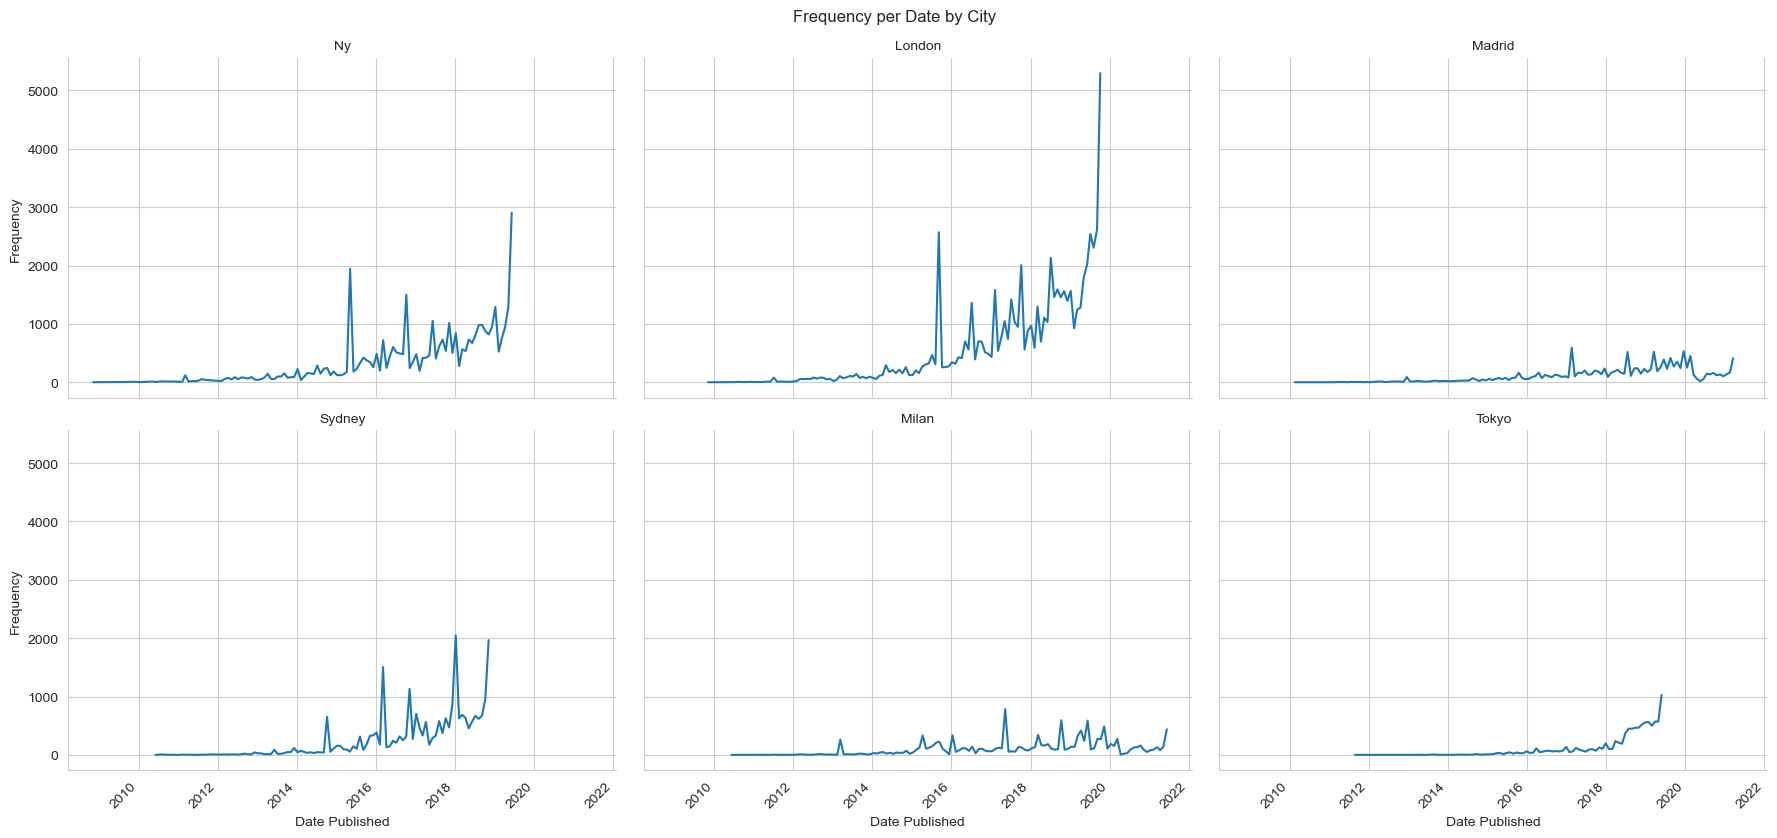

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by date_published and city to get the frequency per date
date_freq = df.groupby(['date_published', 'city']).size().reset_index(name='frequency')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a FacetGrid to plot multiple line plots, one for each city
g = sns.FacetGrid(date_freq, col="city", col_wrap=3, height=4, aspect=1.5)

# Map the data to the FacetGrid
g.map(sns.lineplot, "date_published", "frequency")

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Date Published", "Frequency")
g.fig.suptitle('Frequency per Date by City', y=1.02)

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

plt.show()

Analizar los valores del campo numero de reviews cuando reviews por mes son nulas

In [376]:
# Filter the DataFrame where 'reviews_per_month' is null
null_reviews_per_month_df = df[df['reviews_per_month'].isnull()]

# Group by city and count the number of records where 'number_of_reviews' is equal to zero
zero_reviews_count = null_reviews_per_month_df[null_reviews_per_month_df['number_of_reviews'] == 0].groupby('city').size()

# Group by city and count the number of records where 'number_of_reviews' is greater than zero
greater_than_zero_reviews_count = null_reviews_per_month_df[null_reviews_per_month_df['number_of_reviews'] > 0].groupby('city').size()

# Print the results
print("Number of records where 'reviews_per_month' is null and 'number_of_reviews' is equal to zero, by city:")
print(zero_reviews_count)

print("\nNumber of records where 'reviews_per_month' is null and 'number_of_reviews' is greater than zero, by city:")
print(greater_than_zero_reviews_count)


Number of records where 'reviews_per_month' is null and 'number_of_reviews' is equal to zero, by city:
city
London    20006
Madrid     5637
Milan      5062
Ny        10052
Sydney    11814
Tokyo      1677
dtype: int64

Number of records where 'reviews_per_month' is null and 'number_of_reviews' is greater than zero, by city:
city
Sydney    123
dtype: int64


##### Convertir a moneda comun el precio en moneda local.

In [363]:


# Group by city and aggregate to find the minimum and maximum dates
date_range_by_city = df.groupby('city')['date_published'].agg(['min', 'max'])

# Display the result
print(date_range_by_city)


              min        max
city                        
London 2003-03-02 2019-10-06
Madrid 2004-01-28 2021-03-15
Milan  2001-06-03 2021-06-11
Ny     2001-04-28 2019-06-08
Sydney 2003-07-25 2018-11-07
Tokyo  2011-01-28 2019-05-27


#### Análisis de nulos

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

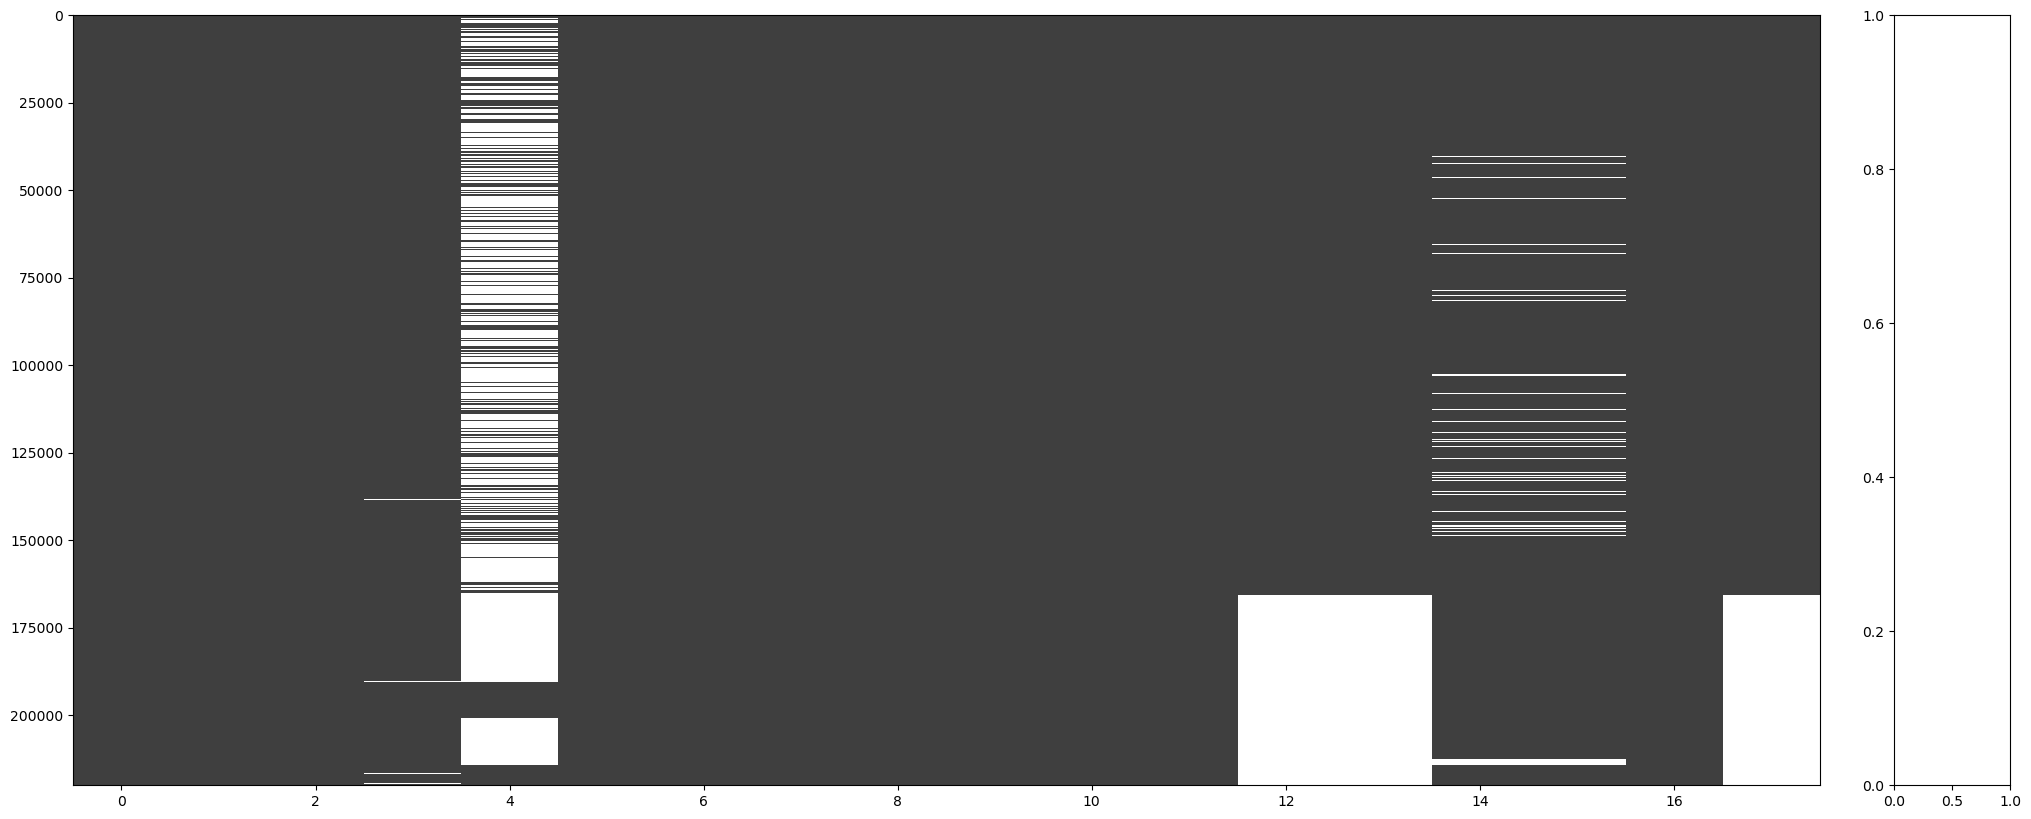

In [362]:
# Sort the DataFrame by city in descending order
df_sorted_by_city = df.sort_values(by='date_published', ascending=True)

# Visualize the missing data matrix
msno.matrix(df_sorted_by_city)

<Axes: >

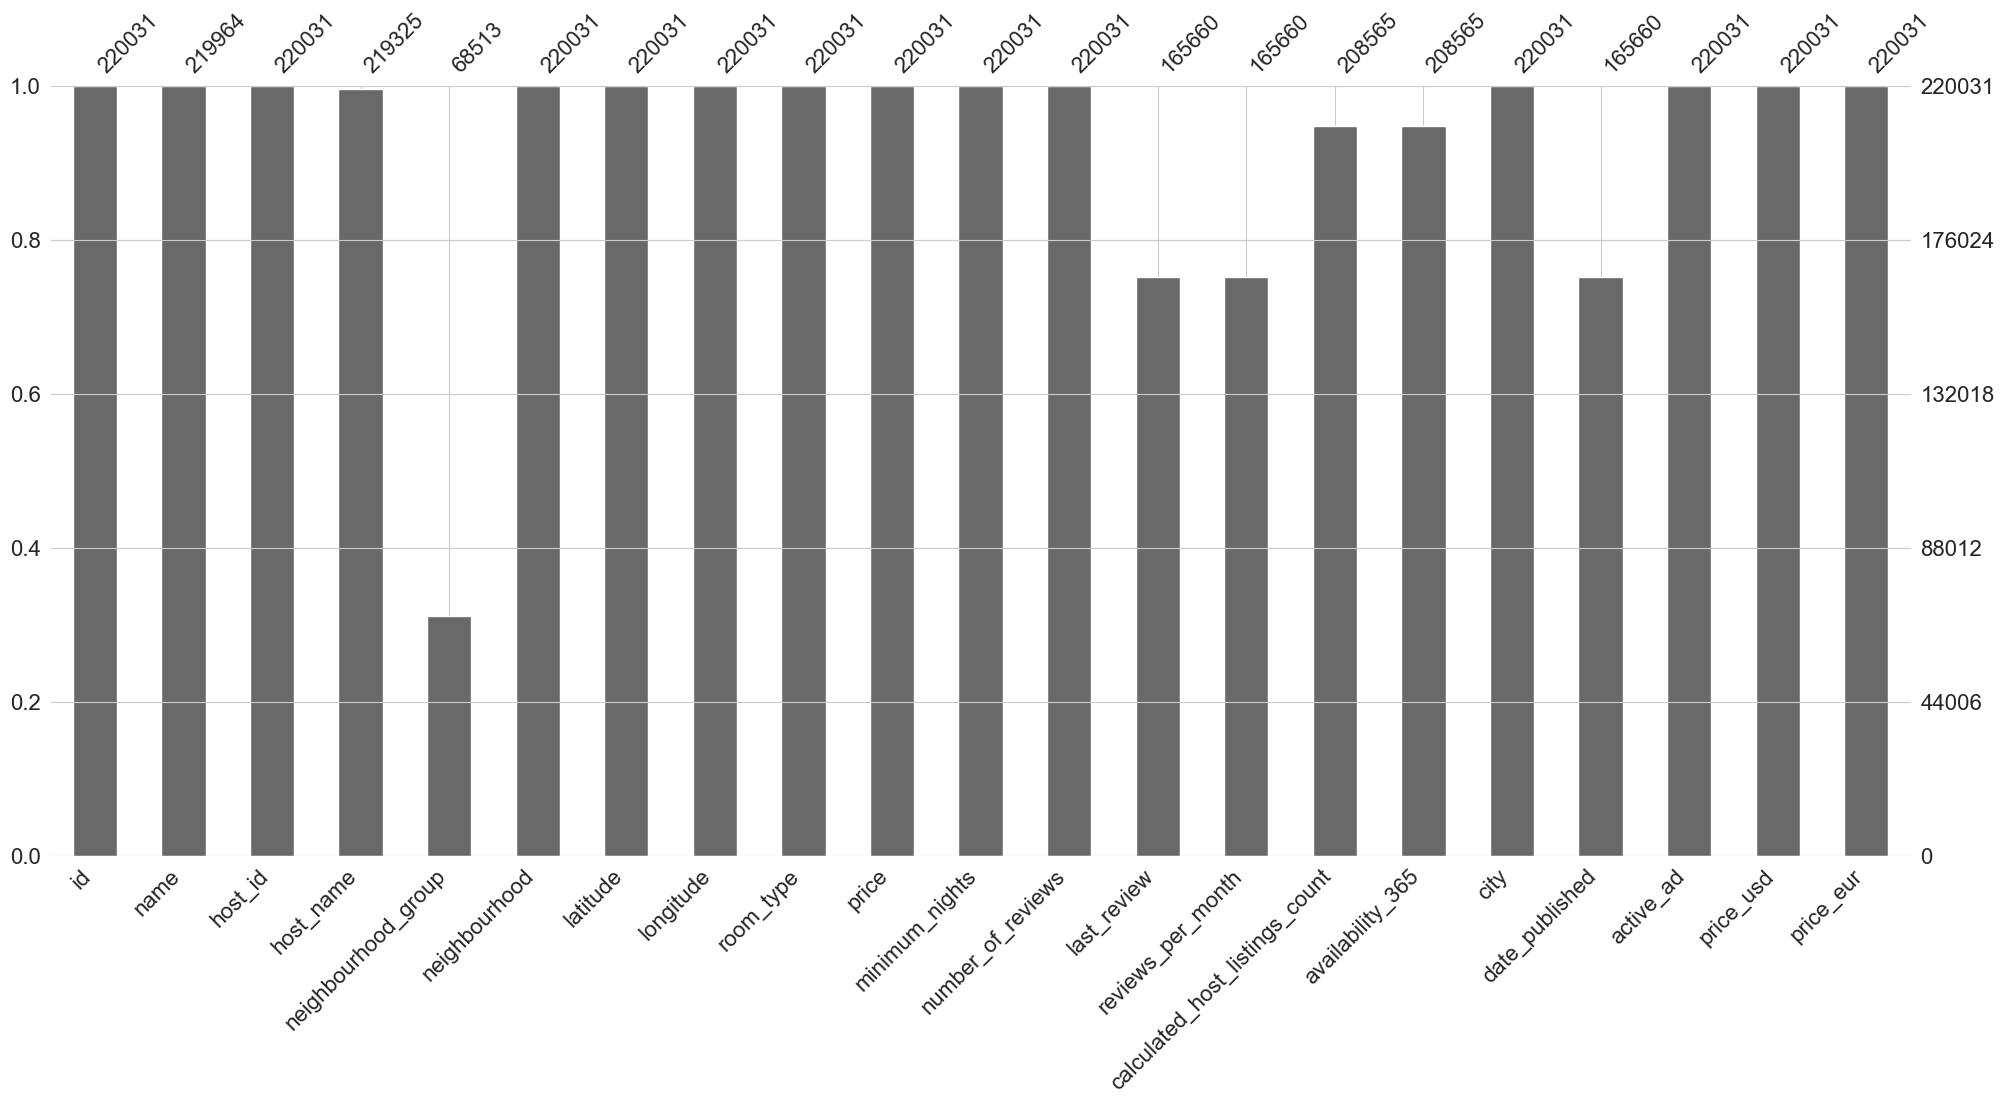

In [1071]:
msno.bar(df)

#### Exportar el dataframe df a csv paea un analisis en otra herramienta

In [ ]:
df.to_csv('airbnb_data.csv', index=False)

#### A Partir de aquí, se avanza en el analisis tanto en PowerBI como por aquí